**Install Package yang akan dipakai**


In [1]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install mlxtend pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install dask

Note: you may need to restart the kernel to use updated packages.


**Import Library yang akan dipakai**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud

**4.1. Data Selection**

**Import Dataset Tabel pertama**

In [8]:
data1 = pd.read_csv('movies.csv')
data1.head(5)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722480 entries, 0 to 722479
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  int64  
 1   title                 722474 non-null  object 
 2   genres                511978 non-null  object 
 3   original_language     722480 non-null  object 
 4   overview              604118 non-null  object 
 5   popularity            722480 non-null  float64
 6   production_companies  337256 non-null  object 
 7   release_date          670592 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               688110 non-null  float64
 11  status                722480 non-null  object 
 12  tagline               108317 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

**Import Dataset Tabel kedua**

In [10]:
data2 = pd.read_csv('netflix_dataset.csv')
data2.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**Deskripsi dataset**

In [12]:
# Menghasilkan ringkasan statistik 
deskripsi = data1.describe()
# Memilih hanya count(jumlah), min(nilai minimal) dan max(nilai maksimal) 
deskripsi_singkat = deskripsi.loc[['count', 'min', 'max']] 
deskripsi_singkat.head()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,722480.0,722480.000,7.224800e+05,7.224800e+05,688110.0,722480.0,722480.0
min,2.0,0.600,0.000000e+00,-1.200000e+01,0.0,0.0,0.0
max,968161.0,8763.998,5.000000e+09,2.920357e+09,50505050.0,10.0,33262.0


In [13]:
# Menghasilkan ringkasan statistik 
deskripsi = data2.describe()
# Memilih hanya count(jumlah), min(nilai minimal) dan max(nilai maksimal)
deskripsi_singkat = deskripsi.loc[['count']] 
deskripsi_singkat.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789


**Mengganti nama Dataset Kedua untuk menyamakan nama kolom kedua dengan nama kolom pada dataset pertama**


In [ ]:
data2.rename(columns={ 
                    'Title': 'title',
                    'Director': 'production_companies',
                    'Cast':'credits',
                    'Country': 'original_language',
                    'Release_Date': 'releas ',
                    'Duration': 'runtime',
                    'Type': 'genres',
                    'Description': 'overview',
                    'Rating': 'popularity'}, inplace=True) 
# Menampilkan nama kolom baru 
print("\nNama kolom baru:") 
print(data2.columns)
# Menyimpan dataset dengan nama kolom baru ke file CSV baru 
output_path = 'new_dataset.csv'
data2.to_csv(output_path, index=False) 
print(f"\nDataset dengan nama kolom baru telah disimpan sebagai {output_path}")


Nama kolom baru:
Index(['Show_Id', 'Category', 'title', 'production_companies', 'credits',
       'original_language', 'release_date', 'popularity', 'runtime', 'genres',
       'overview'],
      dtype='object')

Dataset dengan nama kolom baru telah disimpan sebagai new_dataset.csv


In [15]:
data2 = pd.read_csv('new_dataset.csv')
data2.head()

,Show_Id,Category,title,production_companies,credits,original_language,release_date,popularity,runtime,genres,overview
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Show_Id               7789 non-null   object
 1   Category              7789 non-null   object
 2   title                 7789 non-null   object
 3   production_companies  5401 non-null   object
 4   credits               7071 non-null   object
 5   original_language     7282 non-null   object
 6   release_date          7779 non-null   object
 7   popularity            7782 non-null   object
 8   runtime               7789 non-null   object
 9   genres                7789 non-null   object
 10  overview              7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**Menghitung jumlah isi dari dataset perkolom yang tidak memiliki isi data yang sama**

Menghitung data unik Tabel/Dataset pertama

C:\Users\semay\AppData\Local\Temp\ipykernel_20256\3573896372.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='pastel')


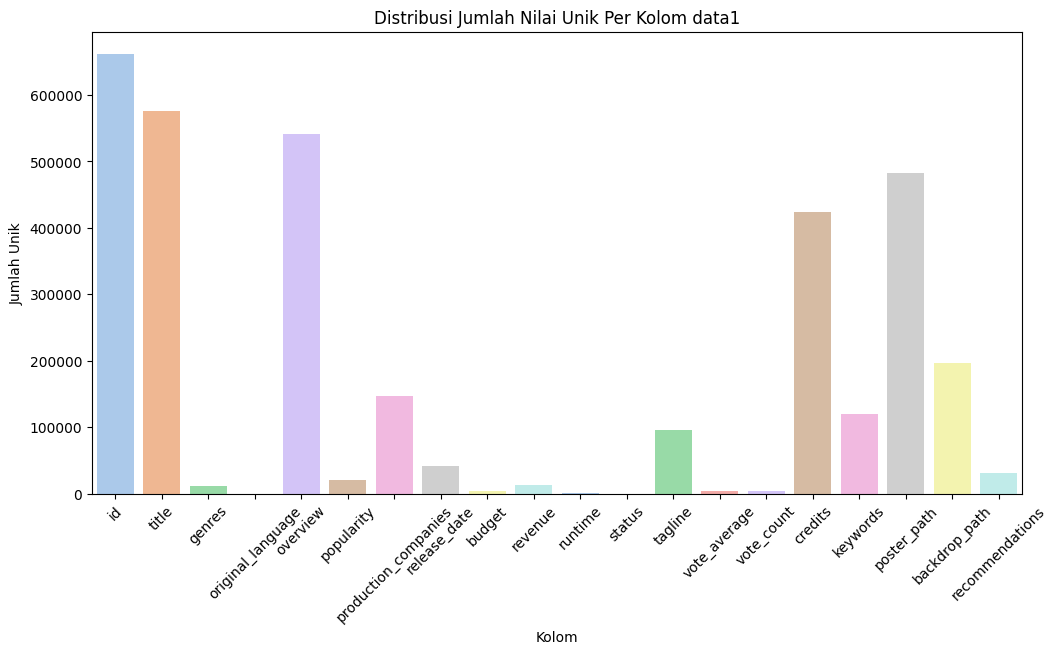

In [17]:
# Fungsi untuk menghitung nilai unik
def nunique_counts(data1):
    counts = {}
    for i in data1.columns:
        counts[i] = data1[i].nunique()
    return counts

# Mendapatkan nilai unik dari setiap kolom
unique_counts = nunique_counts(data1)


# Membuat DataFrame dari hasil unik
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Kolom', 'Jumlah Unik'])

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='pastel')


plt.title('Distribusi Jumlah Nilai Unik Per Kolom data1')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Unik')
plt.xticks(rotation=45)
plt.show()


C:\Users\semay\AppData\Local\Temp\ipykernel_20256\162734935.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='viridis')


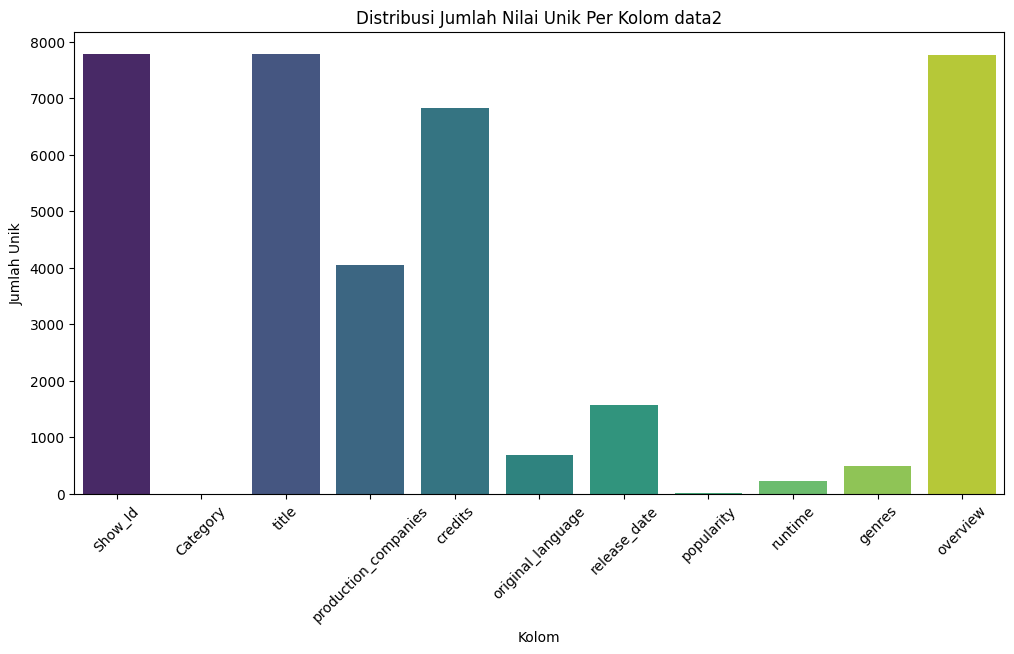

In [18]:
# Fungsi untuk menghitung nilai unik
def nunique_counts(data2):
    counts = {}
    for i in data2.columns:
        counts[i] = data2[i].nunique()
    return counts

# Mendapatkan nilai unik dari setiap kolom
unique_counts = nunique_counts(data2)

# Membuat DataFrame dari hasil unik
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Kolom', 'Jumlah Unik'])

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='viridis')
plt.title('Distribusi Jumlah Nilai Unik Per Kolom data2')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Unik')
plt.xticks(rotation=45)
plt.show()


**Menggabungungkan dataset pertama dan dataset kedua**


In [19]:
df = pd.concat([data1, data2], ignore_index=True) 
print("\nMenggabungkan DataFrame:") 
df.head()


Menggabungkan DataFrame:


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,Show_Id,Category
0,615656.0,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,...,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...,NaN,NaN
1,758323.0,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,...,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...,NaN,NaN
2,667538.0,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,...,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...,NaN,NaN
3,640146.0,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,...,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...,NaN,NaN
4,677179.0,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,...,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  float64
 1   title                 730263 non-null  object 
 2   genres                519767 non-null  object 
 3   original_language     729762 non-null  object 
 4   overview              611907 non-null  object 
 5   popularity            730262 non-null  object 
 6   production_companies  342657 non-null  object 
 7   release_date          678371 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               695899 non-null  object 
 11  status                722480 non-null  object 
 12  tagline               108317 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

**Data Unik Setelah digabung**

C:\Users\semay\AppData\Local\Temp\ipykernel_20256\2703160238.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='viridis')


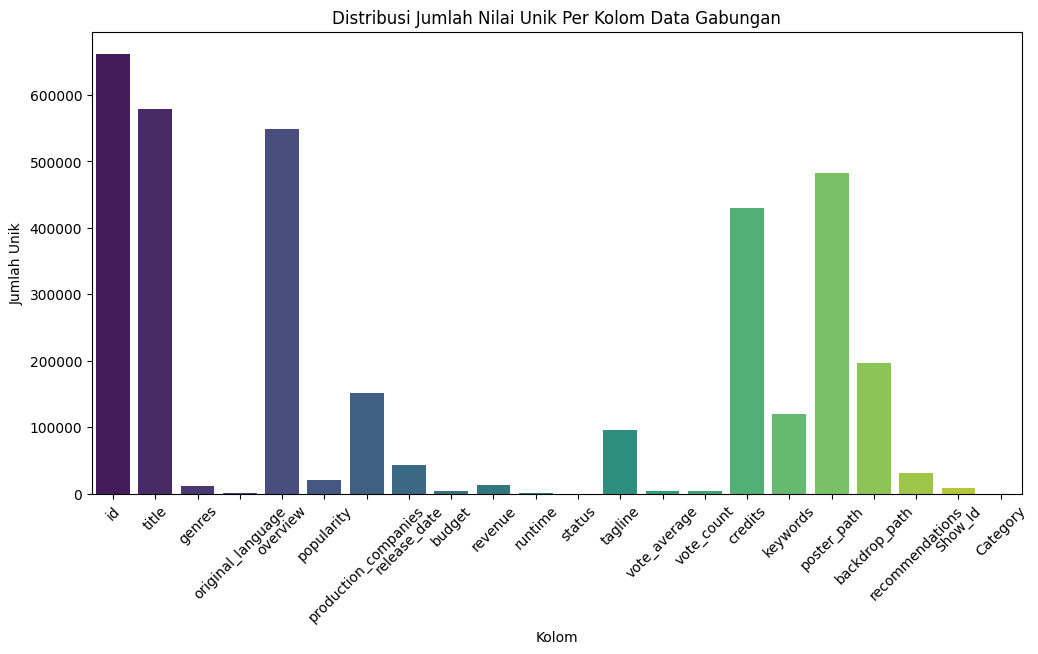

In [21]:
# Fungsi untuk menghitung nilai unik
def nunique_counts(df):
    counts = {}
    for i in df.columns:
        counts[i] = df[i].nunique()
    return counts

# Mendapatkan nilai unik dari setiap kolom
unique_counts = nunique_counts(df)

# Membuat DataFrame dari hasil unik
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Kolom', 'Jumlah Unik'])

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Kolom', y='Jumlah Unik', data=unique_counts_df, palette='viridis')
plt.title('Distribusi Jumlah Nilai Unik Per Kolom Data Gabungan')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Unik')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722480 non-null  float64
 1   title                 730263 non-null  object 
 2   genres                519767 non-null  object 
 3   original_language     729762 non-null  object 
 4   overview              611907 non-null  object 
 5   popularity            730262 non-null  object 
 6   production_companies  342657 non-null  object 
 7   release_date          678371 non-null  object 
 8   budget                722480 non-null  float64
 9   revenue               722480 non-null  float64
 10  runtime               695899 non-null  object 
 11  status                722480 non-null  object 
 12  tagline               108317 non-null  object 
 13  vote_average          722480 non-null  float64
 14  vote_count            722480 non-null  float64
 15  

**4.2. Data Preparation**





**4.2.1. Data Cleaning**

**Mengidentifikasi data yang memiliki duplikat**


In [23]:
print('Jumlah Duplikat data: {}'.format(df.duplicated().sum()))

Jumlah Duplikat data: 3


In [24]:
data = pd.DataFrame(df)

# Menampilkan baris duplikat
duplicates = data[data.duplicated()]
print("Baris duplikat:\n", duplicates)


Baris duplikat:
               id              title                                 genres  \
30074   332415.0       The Maidroid                                 Comedy   
728780       NaN           Backfire  Dramas, Independent Movies, Thrillers   
729102       NaN  The Lost Okoroshi   Comedies, Dramas, Independent Movies   

       original_language                                           overview  \
30074                 ko  Pinky is a real-bot that does housework. She h...   
728780     United States  When two would-be robbers accidentally kill a ...   
729102           Nigeria  A disillusioned security guard transforms into...   

       popularity production_companies       release_date  budget  revenue  \
30074       6.026                  NaN         2015-02-26     0.0      0.0   
728780      TV-MA          Dave Patten      April 5, 2019     NaN      NaN   
729102      TV-MA       Abba T. Makama  September 4, 2020     NaN      NaN   

        ... tagline vote_average vote_co

**Menampilkan data missing values sebelum dihapus dan setelah dihapus**

C:\Users\semay\AppData\Local\Temp\ipykernel_20256\194130811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom', y='Jumlah Unik', data=missing_values, palette='muted')


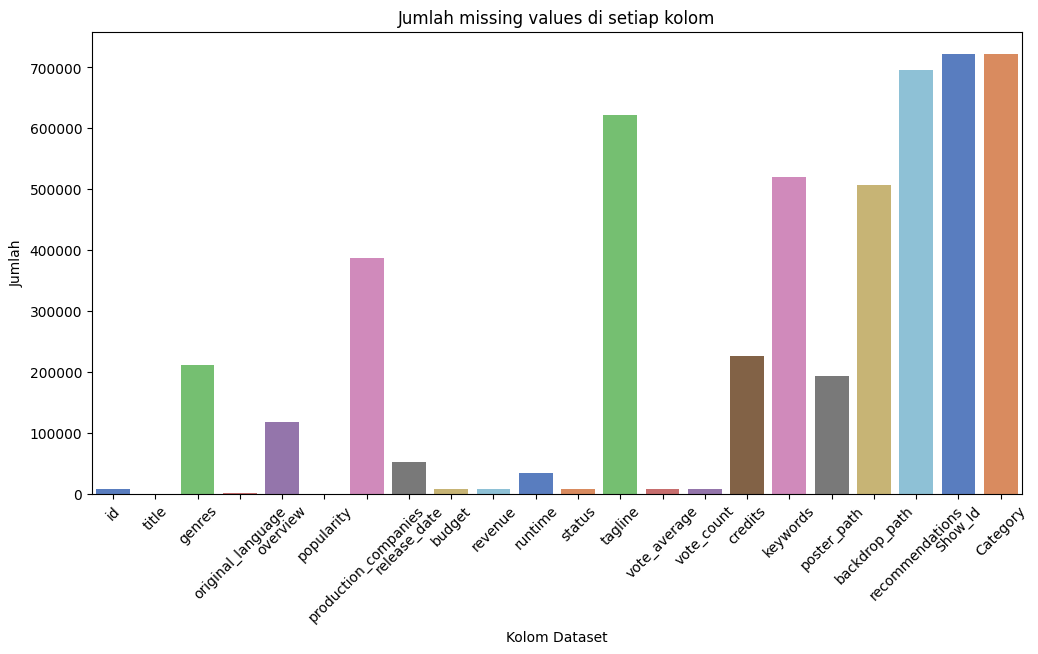

Jumlah missing values di setiap kolom:
                   Kolom  Jumlah Unik
0                     id         7789
1                  title            6
2                 genres       210502
3      original_language          507
4               overview       118362
5             popularity            7
6   production_companies       387612
7           release_date        51898
8                 budget         7789
9                revenue         7789
10               runtime        34370
11                status         7789
12               tagline       621952
13          vote_average         7789
14            vote_count         7789
15               credits       225594
16              keywords       519818
17           poster_path       192557
18         backdrop_path       507379
19       recommendations       695374
20               Show_Id       722480
21              Category       722480


In [25]:
missing_values = df.isnull().sum() 

missing_values = pd.DataFrame(list(missing_values.items()), columns=['Kolom', 'Jumlah Unik'])

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Kolom', y='Jumlah Unik', data=missing_values, palette='muted')
plt.title('Jumlah missing values di setiap kolom')
plt.xlabel('Kolom Dataset')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

print("Jumlah missing values di setiap kolom:") 
print(missing_values)

Mengisi data Nan

In [26]:
# Menampilkan baris dengan missing values
rows_with_missing = df[df.isna().any(axis=1)]
print(rows_with_missing)

              id                                    title  \
0       615656.0                        Meg 2: The Trench   
1       758323.0                      The Pope's Exorcist   
2       667538.0         Transformers: Rise of the Beasts   
3       640146.0        Ant-Man and the Wasp: Quantumania   
4       677179.0                                Creed III   
...          ...                                      ...   
730264       NaN                                     Zozo   
730265       NaN                                   Zubaan   
730266       NaN                        Zulu Man in Japan   
730267       NaN                    Zumbo's Just Desserts   
730268       NaN  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   genres  \
0                           Action-Science Fiction-Horror   
1                                 Horror-Mystery-Thriller   
2                        Action-Adventure-Science Fiction   
3                      

**Mengisi data NaN yang kosong dengan Nilai sebelumnya**

In [27]:

# Mengisi nilai yang hilang dengan nilai sebelumnya (Forward Fill)
df.fillna(method='ffill', inplace=True)


C:\Users\semay\AppData\Local\Temp\ipykernel_20256\3532498380.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


C:\Users\semay\AppData\Local\Temp\ipykernel_20256\194130811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kolom', y='Jumlah Unik', data=missing_values, palette='muted')


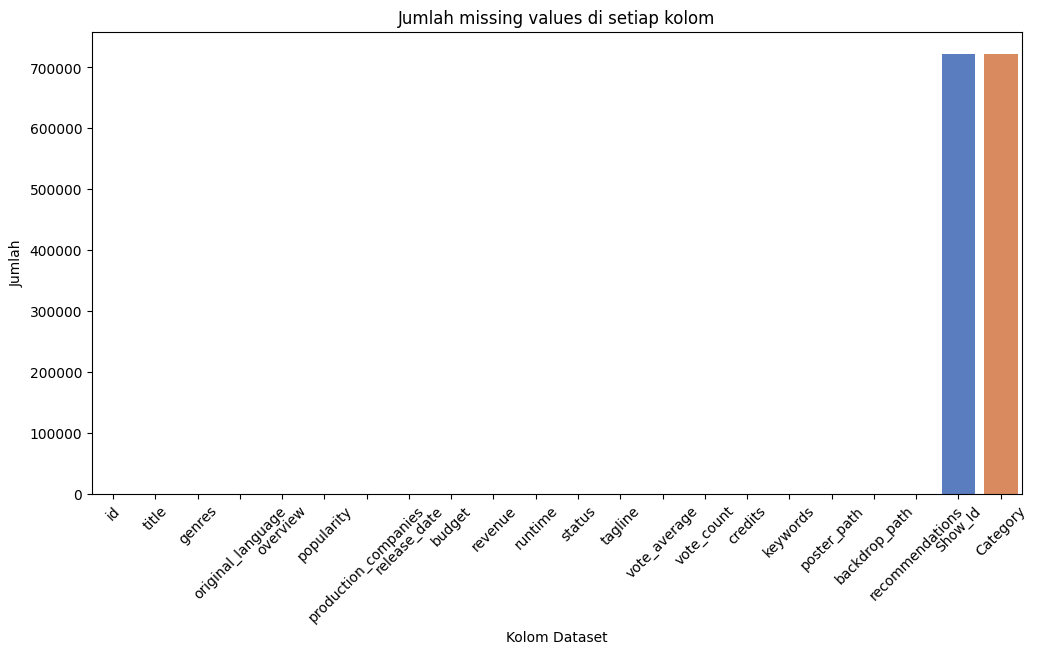

Jumlah missing values di setiap kolom:
                   Kolom  Jumlah Unik
0                     id            0
1                  title            0
2                 genres            0
3      original_language            0
4               overview            0
5             popularity            0
6   production_companies            0
7           release_date            0
8                 budget            0
9                revenue            0
10               runtime            0
11                status            0
12               tagline            0
13          vote_average            0
14            vote_count            0
15               credits            0
16              keywords            0
17           poster_path            0
18         backdrop_path            0
19       recommendations            0
20               Show_Id       722480
21              Category       722480


In [28]:
missing_values = df.isnull().sum() 

missing_values = pd.DataFrame(list(missing_values.items()), columns=['Kolom', 'Jumlah Unik'])

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Kolom', y='Jumlah Unik', data=missing_values, palette='muted')
plt.title('Jumlah missing values di setiap kolom')
plt.xlabel('Kolom Dataset')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

print("Jumlah missing values di setiap kolom:") 
print(missing_values)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    730269 non-null  float64
 1   title                 730269 non-null  object 
 2   genres                730269 non-null  object 
 3   original_language     730269 non-null  object 
 4   overview              730269 non-null  object 
 5   popularity            730269 non-null  object 
 6   production_companies  730269 non-null  object 
 7   release_date          730269 non-null  object 
 8   budget                730269 non-null  float64
 9   revenue               730269 non-null  float64
 10  runtime               730269 non-null  object 
 11  status                730269 non-null  object 
 12  tagline               730269 non-null  object 
 13  vote_average          730269 non-null  float64
 14  vote_count            730269 non-null  float64
 15  

**Menghapus kolom yang tidak diperlukan**

In [30]:
# Menghapus kolom 'post_path', 'backdrop_path', dan 'recommendations'
df.drop(['vote_average','vote_count','poster_path', 'backdrop_path', 'recommendations','Show_Id', 'Category'], axis=1, inplace=True)

# Menampilkan DataFrame setelah kolom dihapus
print(df)

              id                                    title  \
0       615656.0                        Meg 2: The Trench   
1       758323.0                      The Pope's Exorcist   
2       667538.0         Transformers: Rise of the Beasts   
3       640146.0        Ant-Man and the Wasp: Quantumania   
4       677179.0                                Creed III   
...          ...                                      ...   
730264  968161.0                                     Zozo   
730265  968161.0                                   Zubaan   
730266  968161.0                        Zulu Man in Japan   
730267  968161.0                    Zumbo's Just Desserts   
730268  968161.0  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   genres  \
0                           Action-Science Fiction-Horror   
1                                 Horror-Mystery-Thriller   
2                        Action-Adventure-Science Fiction   
3                      

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    730269 non-null  float64
 1   title                 730269 non-null  object 
 2   genres                730269 non-null  object 
 3   original_language     730269 non-null  object 
 4   overview              730269 non-null  object 
 5   popularity            730269 non-null  object 
 6   production_companies  730269 non-null  object 
 7   release_date          730269 non-null  object 
 8   budget                730269 non-null  float64
 9   revenue               730269 non-null  float64
 10  runtime               730269 non-null  object 
 11  status                730269 non-null  object 
 12  tagline               730269 non-null  object 
 13  credits               730269 non-null  object 
 14  keywords              730269 non-null  object 
dtype

**Menghapus nilai/data yang menyimpang/outliers sebelum dan sesudah dihapus**

In [32]:
# Menghitung Z-score untuk setiap kolom
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Menyaring baris dengan Z-score yang lebih kecil dari 3
df_clean = df[(z_scores < 3).all(axis=1)]

# Menampilkan data setelah menghapus outliers
print(df_clean)


              id                                    title  \
9       956101.0                        The Eighth Clause   
15      933131.0                          Badland Hunters   
17      965839.0                      Lord of the Streets   
19      772515.0                  Huesera: The Bone Woman   
20      619930.0                                   Narvik   
...          ...                                      ...   
730264  968161.0                                     Zozo   
730265  968161.0                                   Zubaan   
730266  968161.0                        Zulu Man in Japan   
730267  968161.0                    Zumbo's Just Desserts   
730268  968161.0  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   genres  \
9                                                Thriller   
15                           Action-Science Fiction-Drama   
17                                                 Action   
19                     

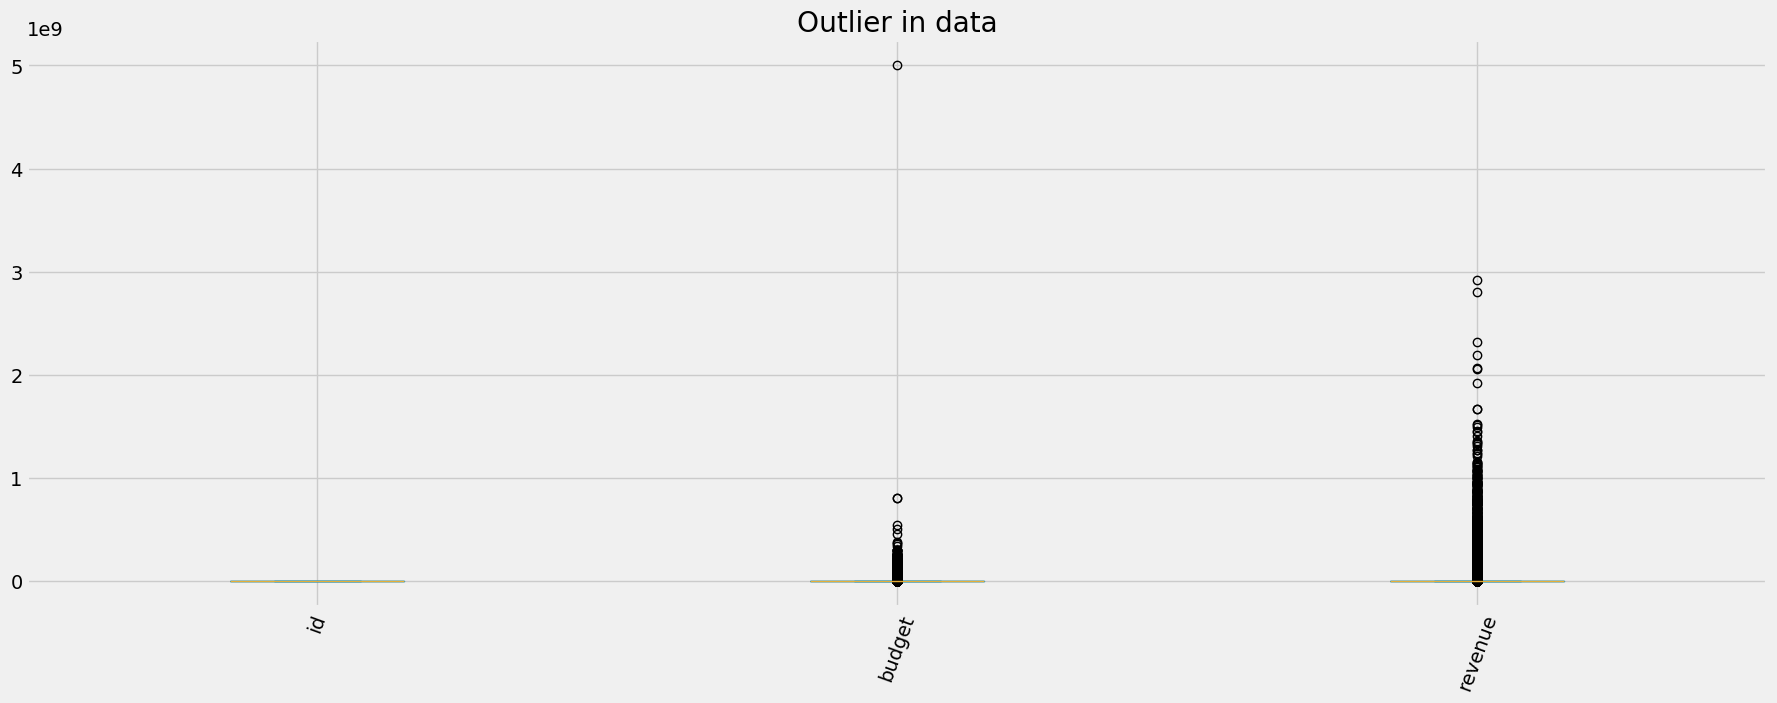

In [33]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

In [34]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [35]:
outlier_list = ['budget','revenue']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

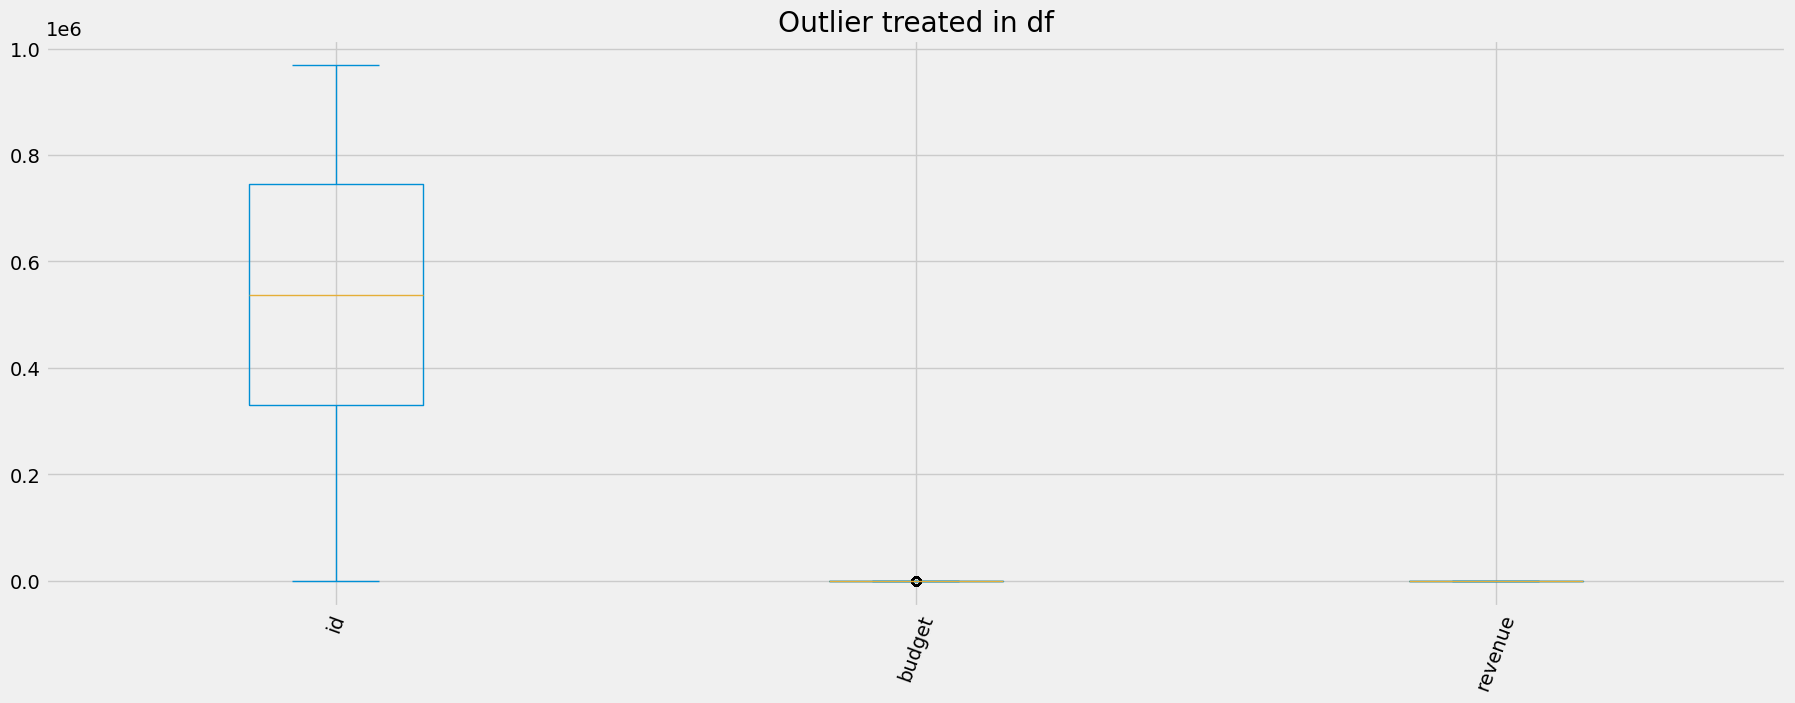

In [36]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    730269 non-null  float64
 1   title                 730269 non-null  object 
 2   genres                730269 non-null  object 
 3   original_language     730269 non-null  object 
 4   overview              730269 non-null  object 
 5   popularity            730269 non-null  object 
 6   production_companies  730269 non-null  object 
 7   release_date          730269 non-null  object 
 8   budget                730269 non-null  float64
 9   revenue               730269 non-null  float64
 10  runtime               730269 non-null  object 
 11  status                730269 non-null  object 
 12  tagline               730269 non-null  object 
 13  credits               730269 non-null  object 
 14  keywords              730269 non-null  object 
dtype

In [38]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,credits,keywords
0,615656.0,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,1.0,0.0,116.0,Released,Back for seconds.,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju
1,758323.0,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,1.0,0.0,103.0,Released,Inspired by the actual files of Father Gabriel...,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...
2,667538.0,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,1.0,0.0,127.0,Released,Unite or fall.,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...
3,640146.0,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,1.0,0.0,125.0,Released,Witness the beginning of a new dynasty.,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...
4,677179.0,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,1.0,0.0,116.0,Released,You can't run from your past.,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730269 entries, 0 to 730268
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    730269 non-null  float64
 1   title                 730269 non-null  object 
 2   genres                730269 non-null  object 
 3   original_language     730269 non-null  object 
 4   overview              730269 non-null  object 
 5   popularity            730269 non-null  object 
 6   production_companies  730269 non-null  object 
 7   release_date          730269 non-null  object 
 8   budget                730269 non-null  float64
 9   revenue               730269 non-null  float64
 10  runtime               730269 non-null  object 
 11  status                730269 non-null  object 
 12  tagline               730269 non-null  object 
 13  credits               730269 non-null  object 
 14  keywords              730269 non-null  object 
dtype

In [40]:
# Mengidentifikasi kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Mengubah tipe data kolom numerik menjadi float32
df[numeric_cols] = df[numeric_cols].astype('float32')

print(df.dtypes)


id                      float32
title                    object
genres                   object
original_language        object
overview                 object
popularity               object
production_companies     object
release_date             object
budget                  float32
revenue                 float32
runtime                  object
status                   object
tagline                  object
credits                  object
keywords                 object
dtype: object


**4.3. Transformasi Data**

In [41]:
df.to_csv("fix.csv",index=False)

In [42]:
import pandas as pd
df=pd.read_csv("fix.csv")

C:\Users\semay\AppData\Local\Temp\ipykernel_20256\2721457551.py:2: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("fix.csv")


In [43]:
print(df.shape)

(730269, 15)


In [44]:
# Hitung jumlah kombinasi unik
unique_combinations = df.groupby(['id', 'genres']).size()
print(f"Jumlah kombinasi unik: {len(unique_combinations)}")


Jumlah kombinasi unik: 672875


In [45]:
listOfYear = [2019,2020,2021, 2022, 2023, 2024]
listMovie = []
listOfRules = []

df["Date"] = pd.to_datetime(df["release_date"], format='mixed')

min_confidence = 0.6  

for year in listOfYear:
    dfs = df[df["Date"].dt.year == year]
    
    dfs['genres'] = dfs['genres'].str.split('-')
    
    dfs = dfs.explode('genres')
    
    movie = (dfs.groupby(['id', 'genres'])['popularity']
             .count()
             .unstack()
             .reset_index()
             .fillna(0)
             .set_index('id'))
    
    movie = (movie > 0).astype(int)
    listMovie.append(movie)


C:\Users\semay\AppData\Local\Temp\ipykernel_20256\2290818501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['genres'] = dfs['genres'].str.split('-')
C:\Users\semay\AppData\Local\Temp\ipykernel_20256\2290818501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['genres'] = dfs['genres'].str.split('-')
C:\Users\semay\AppData\Local\Temp\ipykernel_20256\2290818501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [46]:
movie.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War
id,,,,,,,,,,,,,,,,,
83533.0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
359410.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
361537.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
361538.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
365177.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


**4.4. Data Mining**

**Hasil Lift genre yang memiliki kemunculan paling tinggi**

In [47]:
for i,movie in enumerate(listMovie):
    frequent_itemsets = apriori(movie, min_support=0.01, use_colnames=True)
    
    rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=len(frequent_itemsets))
    selected_columns_conf = ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence']
    filtered_rules_conf = rules_confidence[selected_columns_conf]

    print(filtered_rules_conf)
    
    rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0,num_itemsets=len(frequent_itemsets))
    selected_columns_lift = ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']
    filtered_rules_lift = rules_lift[selected_columns_lift]

    print(filtered_rules_conf)
    
    combined_rules = {
        'year': year,
        'rules_confidence': filtered_rules_conf,
        'rules_lift': filtered_rules_lift,
    }
    listOfRules.append(combined_rules)

c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []


c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence]
Index: []
              antecedents  consequents  antecedent support  \
0               (History)      (Drama)            0.049200   
1               (Romance)      (Drama)            0.113776   
2                   (War)      (Drama)            0.019065   
3    (Fantasy, Animation)  (Adventure)            0.018450   
4  (Animation, Adventure)    (Fantasy)            0.019065   

   consequent support   support  confidence  
0            0.495695  0.038745    0.787500  
1            0.495695  0.069496    0.610811

c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Menampilkan Hasil perhitungan nilai lift untuk **

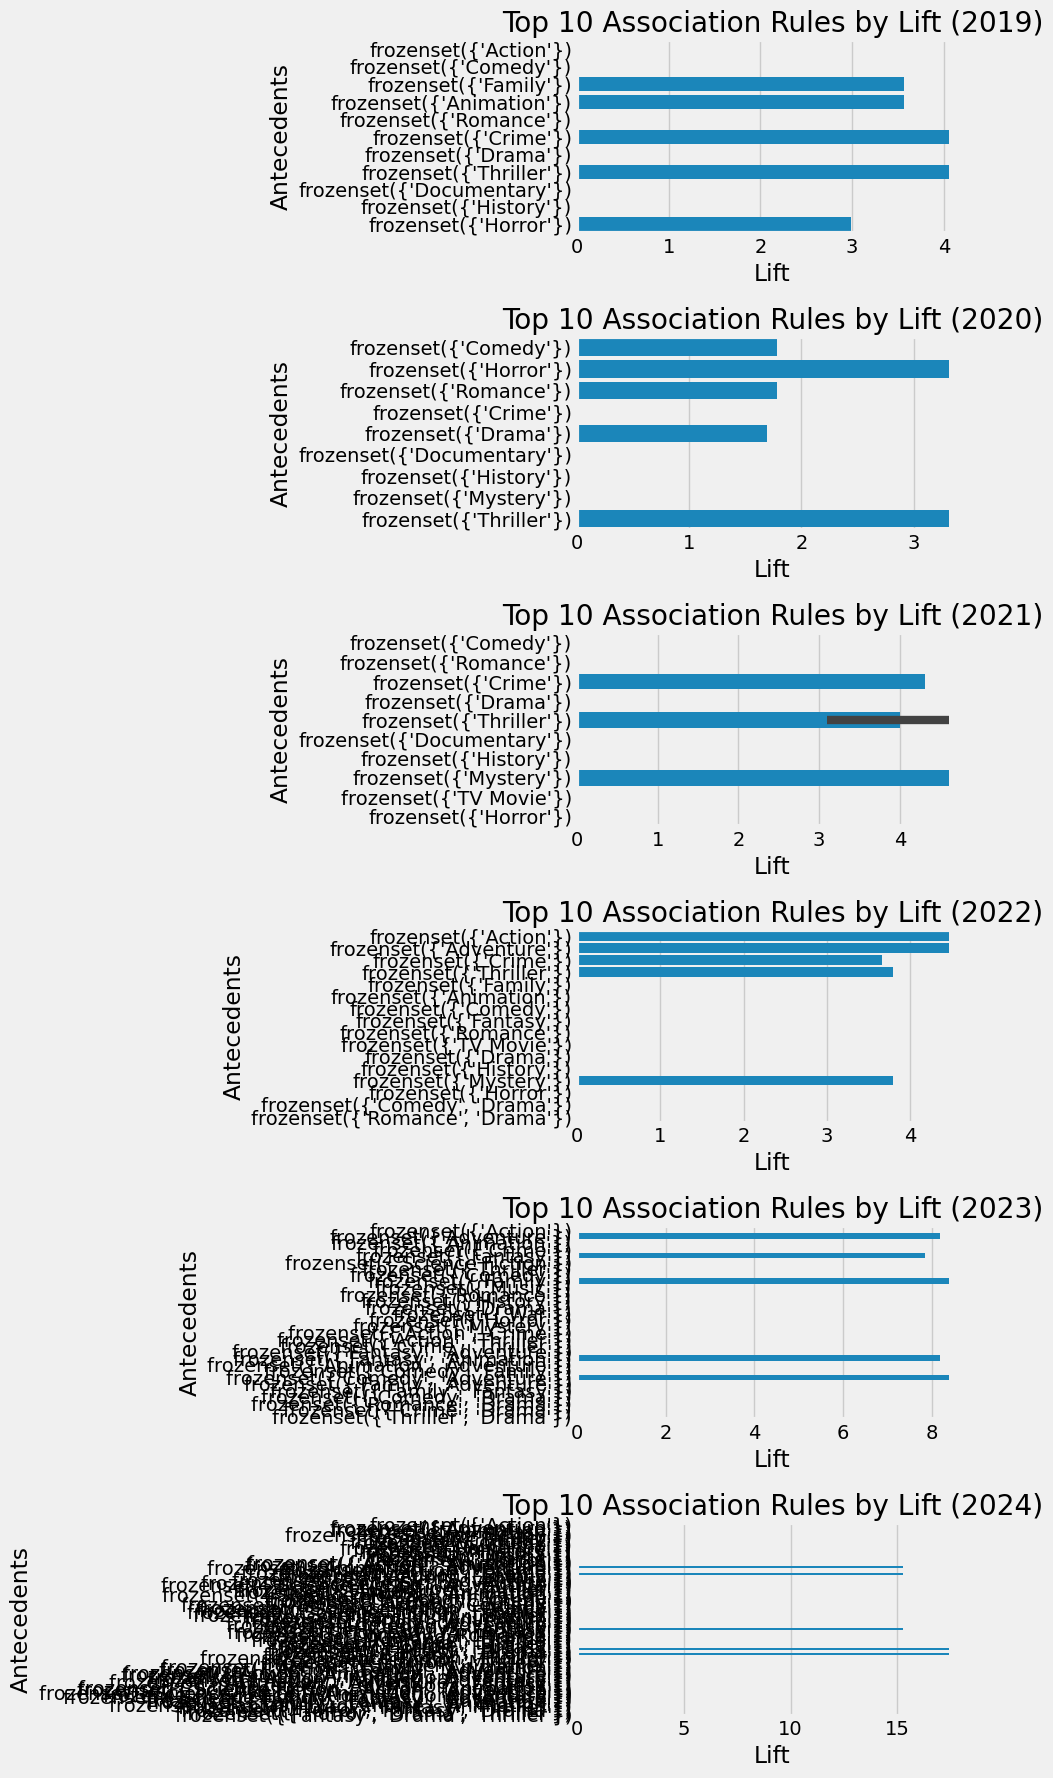

In [48]:
# Create subplots (4 rows and 1 column, adjust the layout as needed)
fig, axes = plt.subplots(len(listOfRules), 1, figsize=(10, 18))

# Iterate over each rule set and corresponding subplot
for i, rules in enumerate(listOfRules):
    # Sort rules by lift in descending order
    rules_sorted = rules['rules_lift'].sort_values(by='lift', ascending=False)
    # Plot top 10 rules in each subplot
    sns.barplot(x='lift', y=rules_sorted['antecedents'].astype(str), data=rules_sorted.head(), ax=axes[i])
    year = rules['year']
    # Set titles and labels for each subplot
    axes[i].set_xlabel('Lift')
    axes[i].set_ylabel('Antecedents')
    axes[i].set_title(f'Top 10 Association Rules by Lift ({2019 + i})')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show(5)


**Hasil Lift permasing-masing Genre terbanyak**

In [49]:
for i, rules in enumerate(listOfRules):
    rules_lift = rules['rules_lift']
    
    high_lift_rules = rules_lift[rules_lift['lift'] > 1.0]
    
    year = rules['year']
    print(f"Year {year} - High Lift Rules:")
    print(high_lift_rules[['antecedents', 'consequents', 'lift']].head())


Year 2024 - High Lift Rules:
   antecedents  consequents      lift
0     (Action)     (Comedy)  1.138879
1     (Comedy)     (Action)  1.138879
2     (Family)  (Animation)  3.565764
3  (Animation)     (Family)  3.565764
4     (Comedy)    (Romance)  1.726830
Year 2024 - High Lift Rules:
  antecedents consequents      lift
0    (Comedy)    (Horror)  1.006571
1    (Horror)    (Comedy)  1.006571
2    (Comedy)   (Romance)  1.785019
3   (Romance)    (Comedy)  1.785019
4     (Crime)     (Drama)  1.437953
Year 2024 - High Lift Rules:
  antecedents consequents      lift
0    (Comedy)   (Romance)  2.143600
1   (Romance)    (Comedy)  2.143600
2     (Crime)     (Drama)  1.308871
3     (Drama)     (Crime)  1.308871
4     (Crime)  (Thriller)  4.308802
Year 2024 - High Lift Rules:
   antecedents  consequents      lift
0     (Action)  (Adventure)  4.471578
1  (Adventure)     (Action)  4.471578
2     (Action)      (Crime)  3.197060
3      (Crime)     (Action)  3.197060
4     (Action)   (Thriller)  2.260

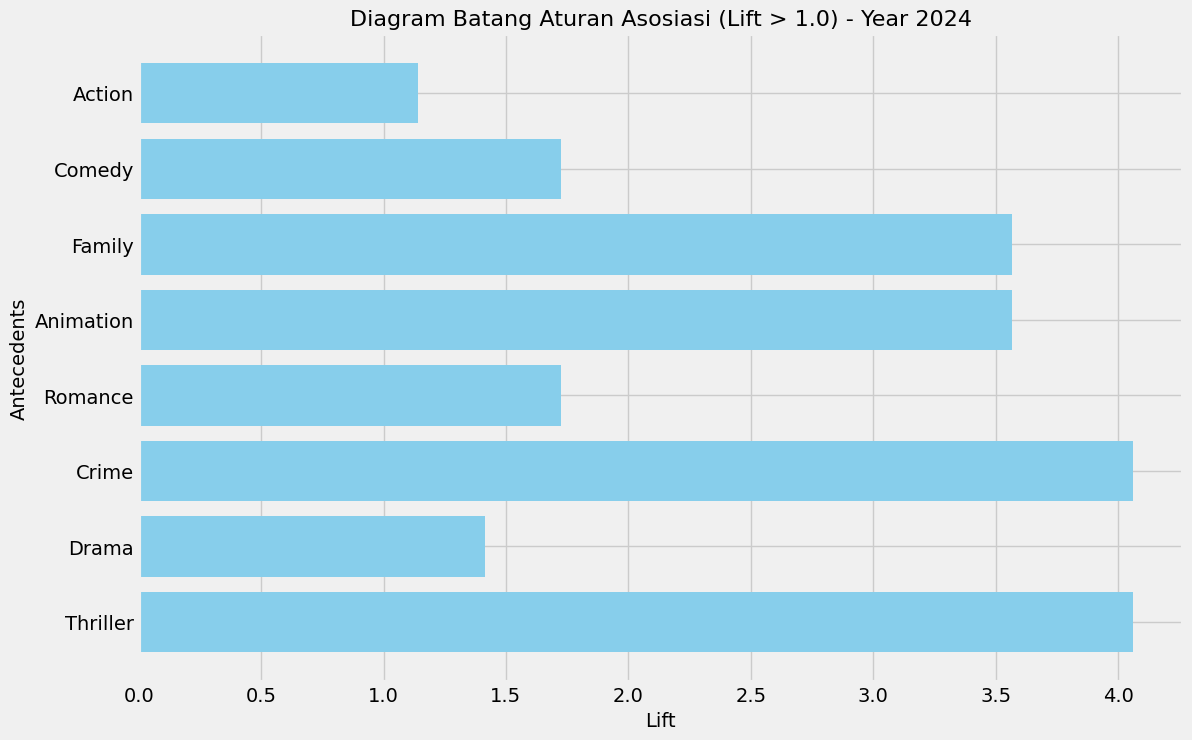

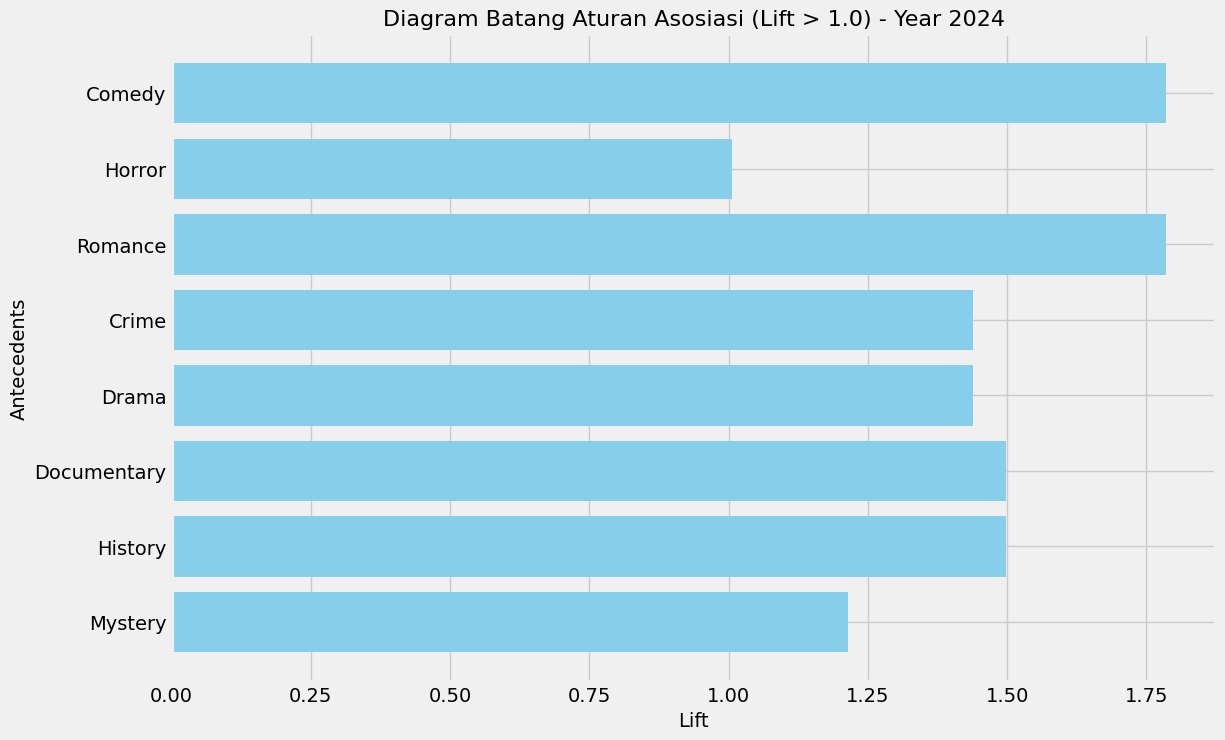

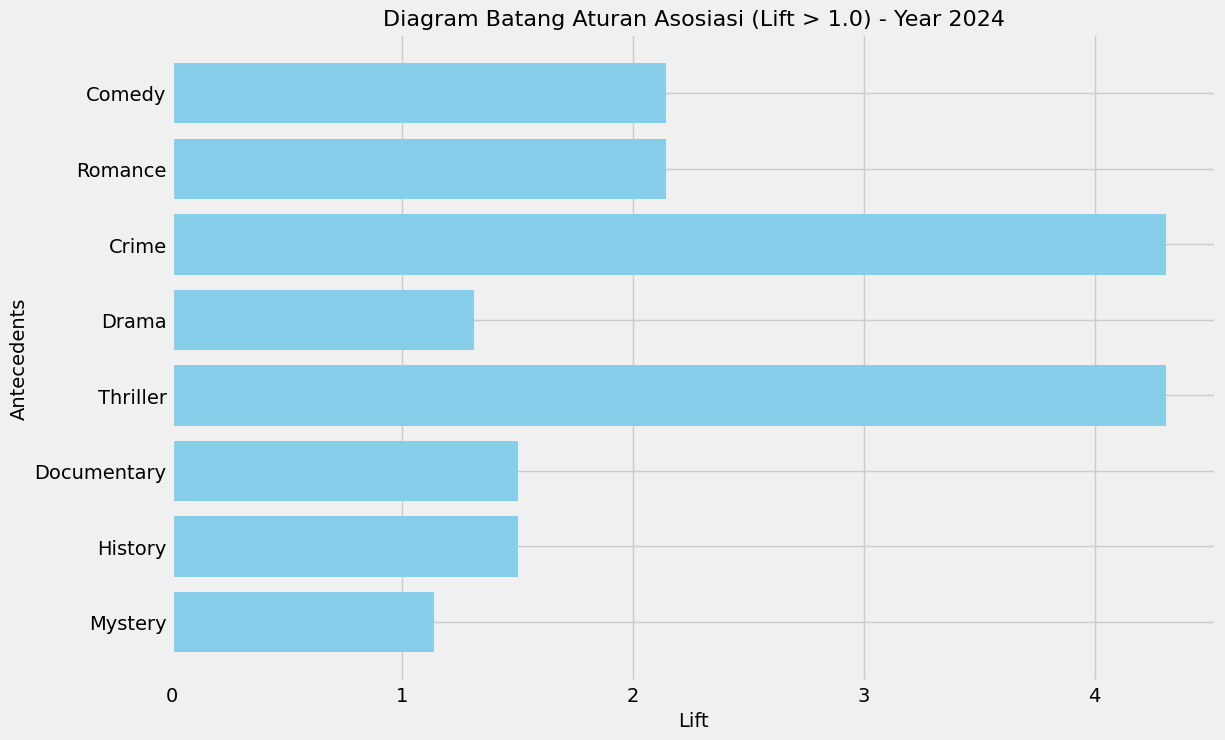

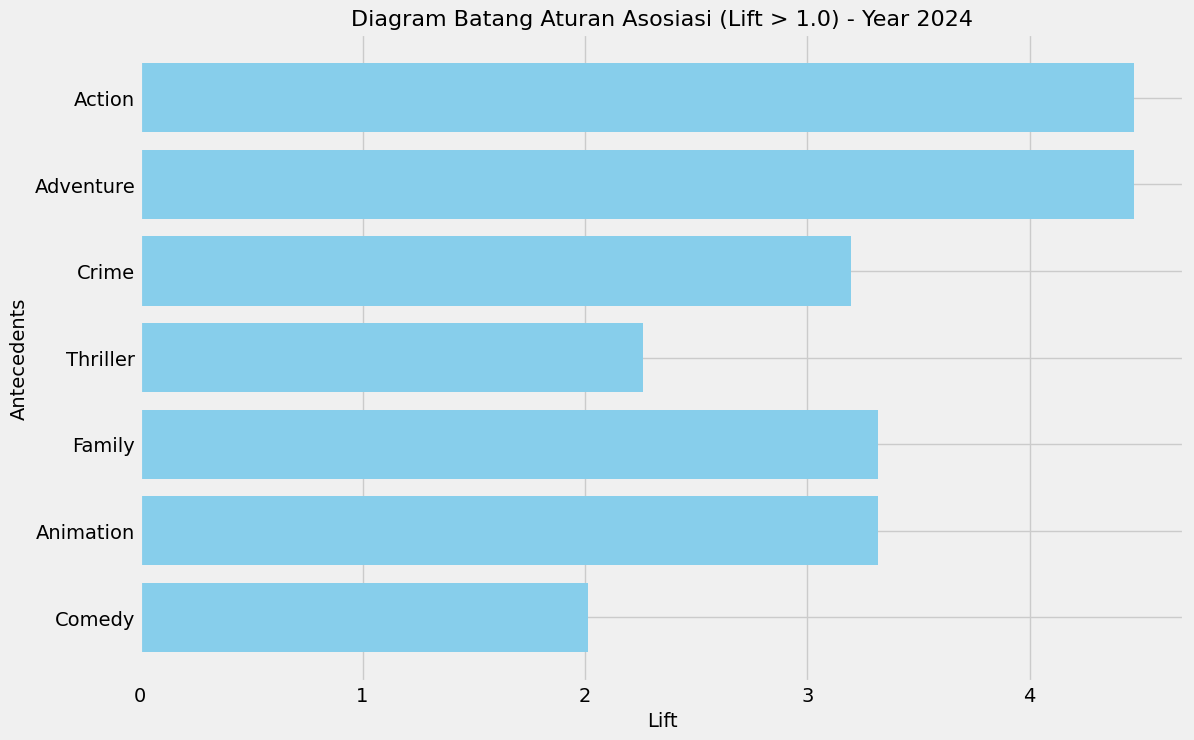

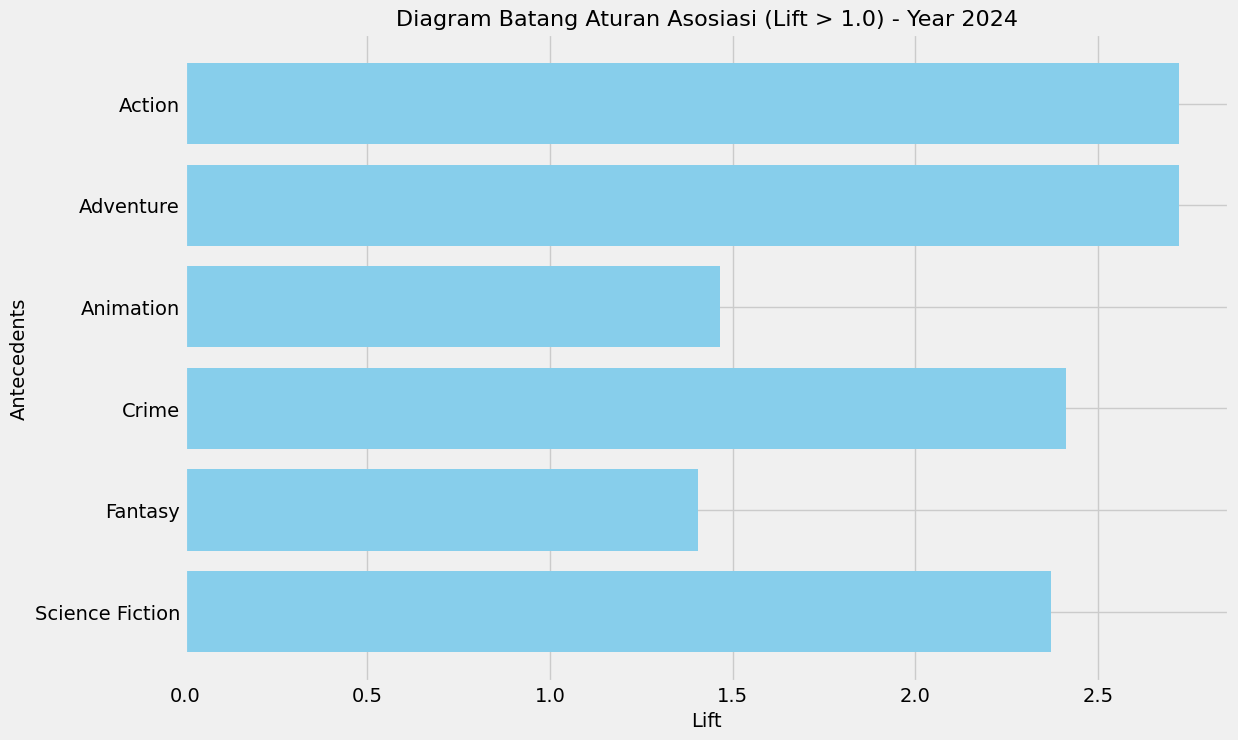

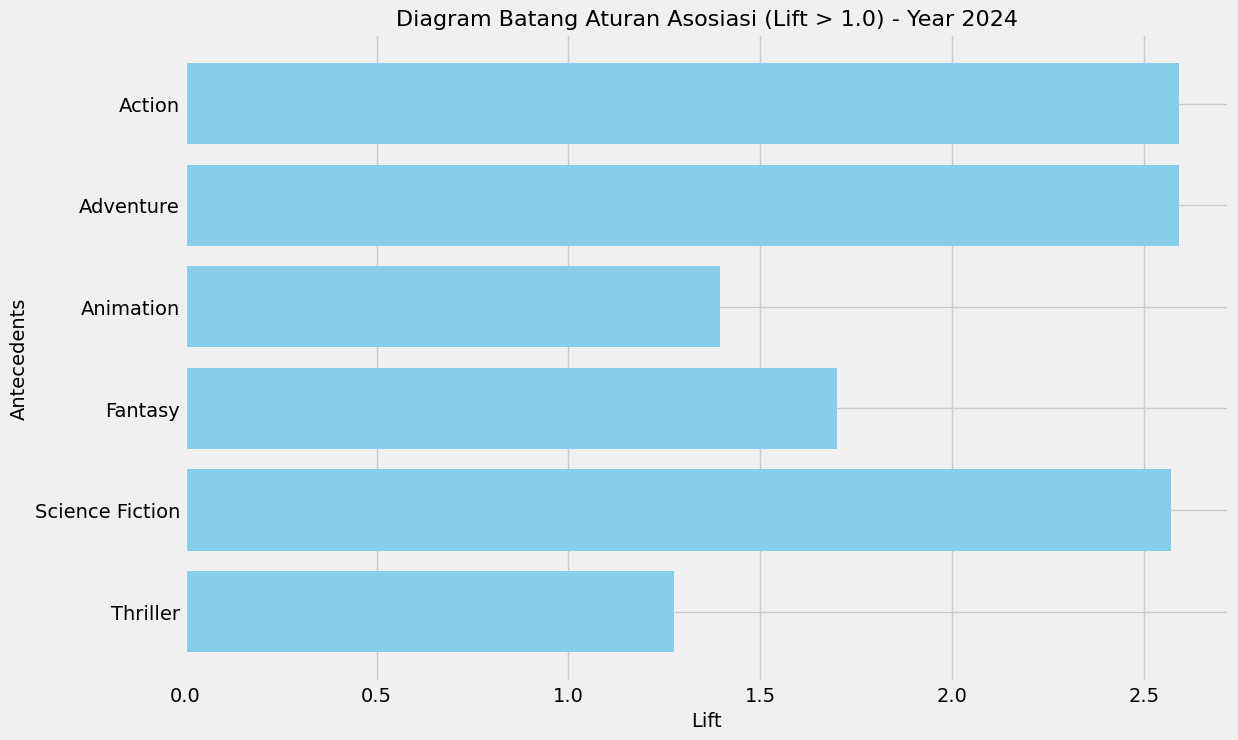

In [50]:

for i, rules in enumerate(listOfRules):
    high_lift_rules = rules['rules_lift'][rules['rules_lift']['lift'] > 1.0].head(10)
    
    antecedents = high_lift_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    lift_values = high_lift_rules['lift']
    
    plt.figure(figsize=(12, 8))
    plt.barh(antecedents, lift_values, color="skyblue")
    plt.xlabel('Lift', fontsize=14)
    plt.ylabel('Antecedents', fontsize=14)
    plt.title(f'Diagram Batang Aturan Asosiasi (Lift > 1.0) - Year {rules["year"]}', fontsize=16)
    plt.gca().invert_yaxis()
    plt.show()


***4.5. Rekomendasi**

Rekomendasi Berdasarkan Aturan Asosiasi:
Jika seseorang menonton Action, mereka juga cenderung menonton Adventure dengan tingkat kepercayaan 43.90%.
Jika seseorang menonton Adventure, mereka juga cenderung menonton Action dengan tingkat kepercayaan 58.06%.
Jika seseorang menonton Action, mereka juga cenderung menonton Animation dengan tingkat kepercayaan 12.20%.
Jika seseorang menonton Animation, mereka juga cenderung menonton Action dengan tingkat kepercayaan 31.25%.
Jika seseorang menonton Action, mereka juga cenderung menonton Fantasy dengan tingkat kepercayaan 19.51%.


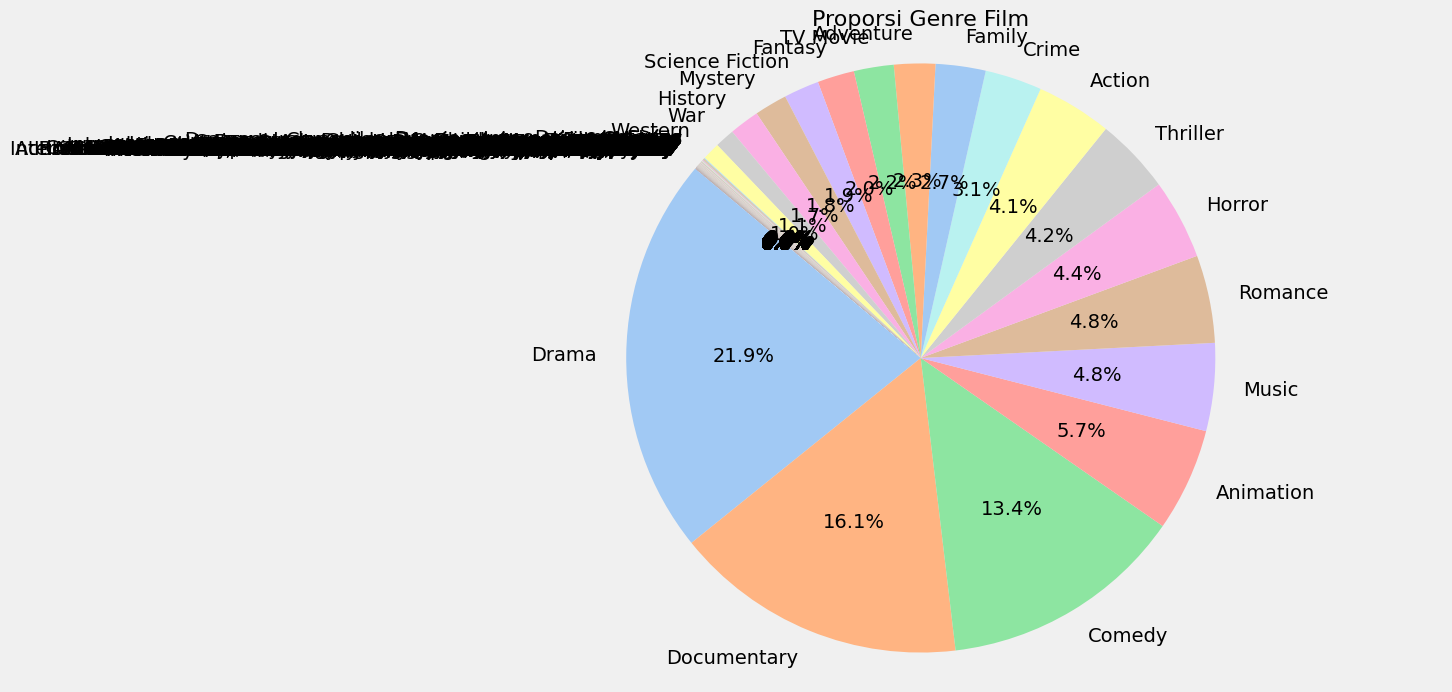

In [51]:

recommendations = high_lift_rules.apply(
    lambda row: (
        f"Jika seseorang menonton {', '.join(list(row['antecedents']))}, "
        f"mereka juga cenderung menonton {', '.join(list(row['consequents']))} "
        f"dengan tingkat kepercayaan {row['confidence']*100:.2f}%."
    ),
    axis=1
)

# Display the first 5 recommendations
print("Rekomendasi Berdasarkan Aturan Asosiasi:")
for recommendation in recommendations.head():
    print(recommendation)
df['genres'] = df['genres'].str.split('-')  
exploded_genres = df.explode('genres')  

genre_counts = exploded_genres['genres'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proporsi Genre Film', fontsize=16)
plt.axis('equal')  
plt.show()


c:\Users\semay\anaconda3\envs\mlxtend\Lib\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


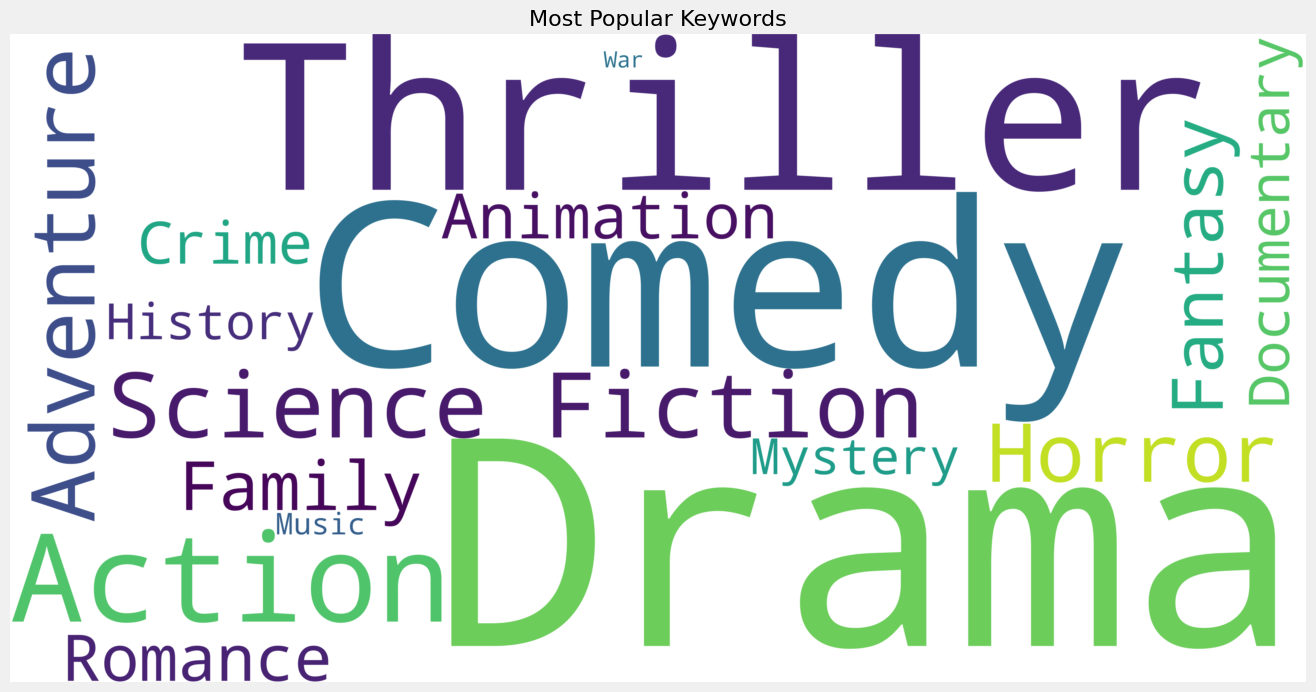

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all genres into a single string for the word cloud
all_genres = ' '.join(dfs['genres'].explode().dropna())  # Ensure genres are separated by space and drop NaN values

# Create the WordCloud object
wordcloud = WordCloud(
    background_color='white', 
    width=10000, 
    height=5000, 
    max_words=100, 
    colormap='viridis'  # Optional: Choose a color scheme
).generate(all_genres)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Popular Keywords', fontsize=16)
plt.show()
